In [105]:
#Импорт библеотек
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Набор только для обращения к истинному датасету
df_main = pd.read_csv(r"C:\Users\andza\AAA\GitHub\A-project-about-Russian-sports-facilities\Data.csv", encoding='Windows-1251')

In [3]:
#Набор для редактирования и дальнейших работ
df = pd.read_csv(r"C:\Users\andza\AAA\GitHub\A-project-about-Russian-sports-facilities\Data.csv", encoding='Windows-1251')

In [4]:
df.head(2)

,id:,Название:,Название (in english):,Активный:,Краткое описание:,Детальное описание:,Краткое описание (in english):,Детальное описание (in english):,МО:,Субъект федерации:,...,Мини координата X:,Мини координата Y:,Генеральный план:,Дополнительные планы:,Фото:,URL фото галереи объекта:,Видео:,Панорамы:,Web-трансляции:,Прочие материалы:
0,208,Крытый плавательный бассейн «Садко» СДЮСШОР,Indoor swimming pool,Y,МБОУ ДОД СДЮСШОР г. Советский единственное учр...,Общая площадь здания «Крытого плавательного ба...,In February 2009 the building of the “Covered...,Total area of ??the &quot Indoor Swimming Pool...,Советский район,Ханты-Мансийский АО,...,0.334,0.3893,0,0,24,http://objects.minsportfcp.ru/objects/detail/g...,0,0,0,1
1,214,Спортивный зал для мини-футбола,Futsal sports hall,Y,"Отдельно стоящее здание, расположено на обособ...","Здание кирпичное, бетонное, блоки «Сэндвичи». ...","Detached building, located on the isolated are...","The building is made of brick, concrete, &quot...",Город Лангепас,Ханты-Мансийский АО,...,NaN,NaN,0,0,18,http://objects.minsportfcp.ru/objects/detail/g...,0,0,0,0


In [5]:
df.shape

(929, 61)

In [6]:
#Наблюдаем количество отсутствующих признаков в колонках
df.isnull().sum()

id:                            0
Название:                      1
Название (in english):        27
Активный:                      1
Краткое описание:            167
                            ... 
URL фото галереи объекта:      1
Видео:                         0
Панорамы:                      0
Web-трансляции:                0
Прочие материалы:              0
Length: 61, dtype: int64

In [7]:
#Просматриваем колонки для того, чтобы лучше понять характер данных в датасете
df.columns

Index(['id:', 'Название:', 'Название (in english):', 'Активный:',
       'Краткое описание:', 'Детальное описание:',
       'Краткое описание (in english):', 'Детальное описание (in english):',
       'МО:', 'Субъект федерации:', 'Значимость:', 'Населённый пункт:',
       'Населённый пункт (in english):', 'Адрес:', 'Адрес (in english):',
       'ОКТМО:', 'ФЦП (федеральная целевая программа):',
       'Действия с объектом:', 'Дата начала строительства / реконструкции:',
       'Дата завершения строительства / реконструкции:',
       'Общий объём финансирования:',
       'Финансирование из федерального бюджета:',
       'Финансирование из федерального бюджета (из них освоено):',
       'Финансирование из бюджета субъекта федерации:',
       'Финансирование из бюджета субъекта федерации (из них освоено):',
       'Финансирование из бюджета муниципального образования:',
       'Финансирование из бюджета муниципального образования (из них освоено):',
       'Финансирование из внебюджетных и

In [8]:
#Удаляем колонки с ненужной для задачи информацией
df = df.drop(columns=['Название (in english):',
                 'Краткое описание:',
                 'Детальное описание:',
                 'Краткое описание (in english):',
                 'Детальное описание (in english):',
                 'Адрес (in english):',
                 'ФЦП (федеральная целевая программа):',
                 'Дата начала строительства / реконструкции:',
                 'Дата завершения строительства / реконструкции:',
                 'Ключевой или нет?:',
                 'Курирующий орган:',
                 'Курирующий орган (in english):',
                 'Адрес курирующего органа:',
                 'Адрес курирующего органа (in english):',
                 'Телефон курирующего органа:',
                 'Контактный телефон объекта:',
                 'E-mail:',
                 'URL сайта:',
                 'Внесён в реестр?:',
                 'Площадь:',
                 'Какие соревнования проводятся?:',
                 'Генеральный план:',
                 'Дополнительные планы:',
                 'Фото:',
                 'URL фото галереи объекта:',
                 'Видео:',
                 'Панорамы:',
                 'Web-трансляции:',
                 'Прочие материалы:',
                 'Режим работы Пн.-Пт.:',
                 'Режим работы Сб.:',
                 'Режим работы Вс.:',
                 'Значимость:',
                 'Населённый пункт (in english):',
                 'Финансирование из федерального бюджета (из них освоено):',
                 'Финансирование из бюджета субъекта федерации (из них освоено):',
                 'Финансирование из бюджета муниципального образования (из них освоено):',
                 'Финансирование из внебюджетных источников (из них освоено):',
                 'Субъект федерации:',
                 'Населённый пункт:',
                 'Действия с объектом:',
                 'Маштаб Яндекс-карты:',
                 'Яндекс координата центра X:',
                 'Яндекс координата центра Y:',
                 'Мини координата X:',
                 'Мини координата Y:',
                 'МО:',
                 'ОКТМО:',
                 'Финансирование из федерального бюджета:',
                 'Финансирование из бюджета субъекта федерации:',
                 'Финансирование из бюджета муниципального образования:',
                 'Финансирование из внебюджетных источников:'

])

In [9]:
df.columns

Index(['id:', 'Название:', 'Активный:', 'Адрес:',
       'Общий объём финансирования:', 'Тип спортивного комплекса:',
       'Виды спорта:', 'Яндекс координата объекта X:',
       'Яндекс координата объекта Y:'],
      dtype='object')

In [10]:
#Переименовываем оставшиеся колонки для удобной работы
df.rename(columns={
    'id:':'id',
    'Название:':'name',
    'Активный:':'current',
    'Адрес:':'adress',
    'Общий объём финансирования:':'financing',
    'Тип спортивного комплекса:':'type_of_complex',
    'Виды спорта:':'types_of_sports',
    'Яндекс координата объекта X:':'longitude',
    'Яндекс координата объекта Y:':'latitude'

}
          ,inplace=True)

In [11]:
df.columns

Index(['id', 'name', 'current', 'adress', 'financing', 'type_of_complex',
       'types_of_sports', 'longitude', 'latitude'],
      dtype='object')

In [12]:
df.describe()

,financing,longitude,latitude
count,9.280000e+02,927.000000,927.000000
mean,1.736664e+08,55.475362,53.511775
std,5.613106e+08,26.794427,5.204169
min,0.000000e+00,20.453600,42.121500
25%,1.597774e+07,39.726200,51.191700
50%,3.813755e+07,45.139000,54.208100
75%,1.277002e+08,56.375750,56.482150
max,7.897261e+09,158.672900,69.758800


In [13]:
df['current'].value_counts()

Y    847
N     81
Name: current, dtype: int64

In [14]:
#Просматриваем типы данных в нужных колонках
df.dtypes

id                  object
name                object
current             object
adress              object
financing          float64
type_of_complex     object
types_of_sports     object
longitude          float64
latitude           float64
dtype: object

(array([145., 103., 136.,  62.,  49.,  38.,  29.,  36.,  17.,  17.,  23.,
         14.,  10.,   4.,  12.,  12.,  11.,   9.,  10.,   8.,   8.,   9.,
          5.,   8.,   8.,   6.,   5.,   4.,   4.,   5.,   4.,   7.,   3.,
          5.,   1.,   3.,   6.,   2.,   3.,   2.,   1.,   2.,   2.,   4.,
          3.,   3.,   0.,   1.,   2.,   1.,   2.,   0.,   0.,   1.,   2.,
          0.,   1.,   1.,   1.,   0.,   2.,   1.,   0.,   3.,   0.,   0.,
          0.,   0.,   0.,   1.,   2.,   1.,   0.,   1.,   1.,   0.,   1.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   2.,   0.,   1.,
          0.,   0.,   0.,   0.,   1.,   1.,   0.,   1.,   0.,   0.,   2.,
          0.,   2.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,
          1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

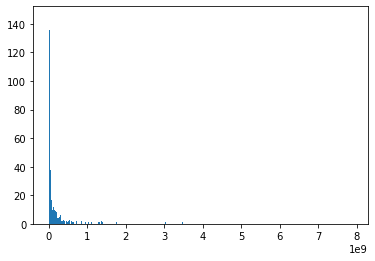

In [101]:
plt.hist(df['financing'], bins=len(df))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='financing'>

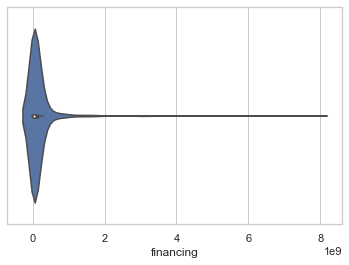

In [115]:
sns.violinplot(df['financing'])

In [104]:
df.financing.value_counts()

0.0           91
8421000.0     24
17500000.0    21
40000000.0    14
8440000.0     12
              ..
48500000.0     1
38900000.0     1
50088100.0     1
14100000.0     1
49400000.0     1
Name: financing, Length: 669, dtype: int64

In [97]:
df

,id,name,current,adress,financing,type_of_complex,types_of_sports,longitude,latitude
0,208,Крытый плавательный бассейн «Садко» СДЮСШОР,Y,"Ханты-Мансийский автономный округ, г. Советски...",147105000.0,бассейн,плавание,63.5594,61.3740
1,214,Спортивный зал для мини-футбола,Y,"Ханты-Мансийский автономный округ, г. Лангепас...",83829000.0,зал спортивный,"игровые виды спорта (разное), мини-футбол, общ...",75.1796,61.2569
2,221,Ледовый дворец спорта,Y,"Ханты - Мансийский автономный округ, г. Сургут...",814724600.0,арена ледовая,"аквааэробика, греко-римская борьба, общая физи...",73.3774,61.2381
3,227,Спортивный центр с плавательным бассейном,Y,"Ханты-Мансийский автономный округ, пос. Лыхма,...",212165000.0,многофункциональный спортивный комплекс,"аквааэробика, плавание",66.9466,63.2185
4,234,Спортивный центр с универсальным игровым залом,Y,"Ханты-Мансийский автономный округ-Югра, г. Лан...",143946000.0,многофункциональный спортивный комплекс,"баскетбол, бодибилдинг, волейбол, настольный т...",75.1941,61.2447
...,...,...,...,...,...,...,...,...,...
924,28783,СДЮСШОР «Динамо» по футболу,N,"г. Симферополь, ул.Кирова, 12а",0.0,многофункциональный спортивный комплекс,NaN,34.1002,44.9483
925,28786,Судакская районная ДЮСШ,N,"г. Судак, ул.Гагарина, 7/2",0.0,многофункциональный спортивный комплекс,NaN,34.9790,44.8503
926,28794,Гребной канал «Дон»,Y,"Ростовская область, г.Ростов-на-Дону, Кировски...",0.0,канал гребной,гребля на байдарках и каноэ,39.7337,47.2042
927,28803,Гребной канал «Крылатское»,N,"г. Москва, Крылатская ул., д. 2",0.0,канал гребной,"гребля на байдарках и каноэ, гребной слалом",37.4352,55.7546


In [22]:
df[df.current == 'Y'].longitude

0      63.5594
1      75.1796
2      73.3774
3      66.9466
4      75.1941
        ...   
843    47.0849
844    49.9227
855    37.8874
888    45.2037
926    39.7337
Name: longitude, Length: 847, dtype: float64

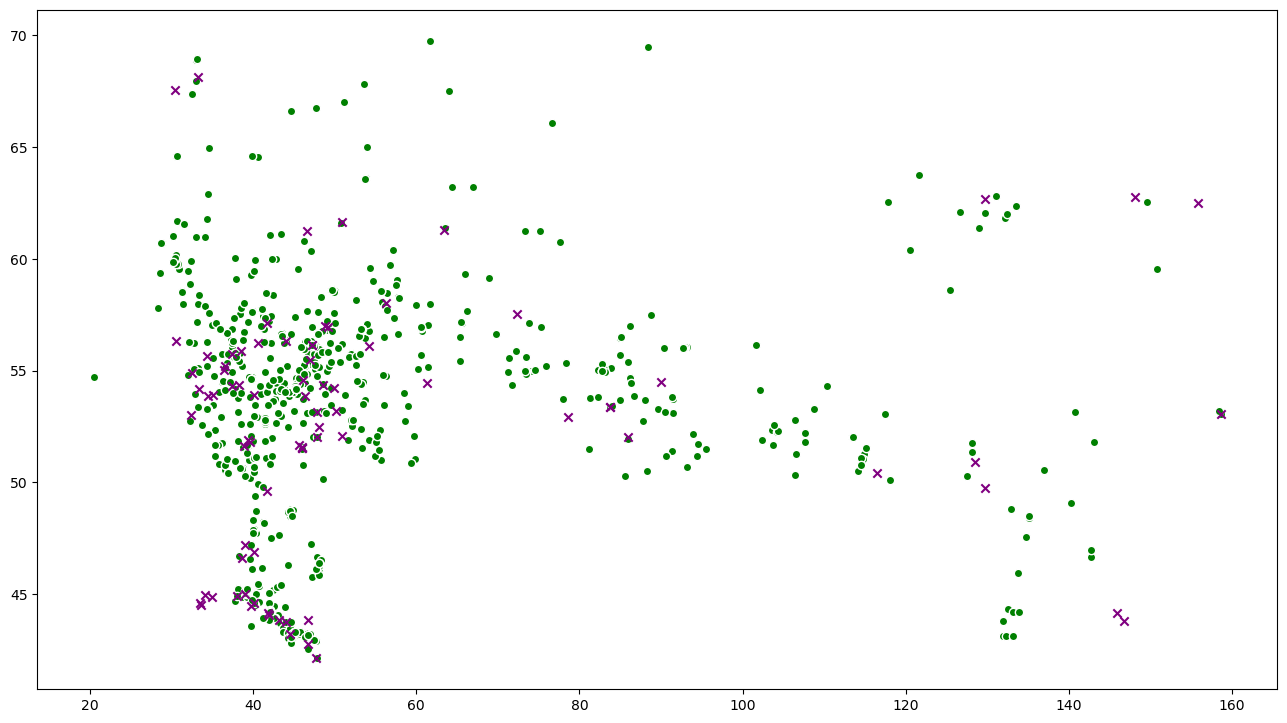

In [78]:
#Расположили спортивные учреждения на графике
plt.figure(figsize=(16, 9), dpi=100)
plt.scatter(df[df.current == 'Y'].longitude, df[df.current == 'Y'].latitude, color='green', edgecolors='white')
plt.scatter(df[df.current == 'N'].longitude, df[df.current == 'N'].latitude, marker='x', facecolor='purple')

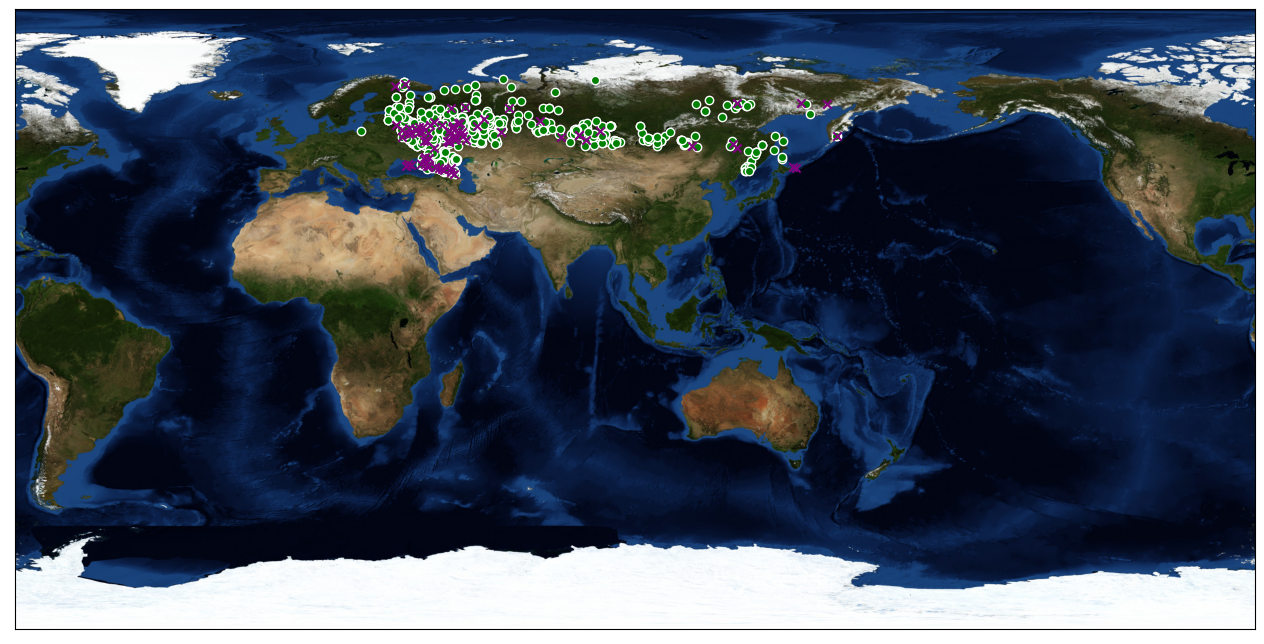

In [96]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
plt.figure(figsize=(16, 9), dpi=100)
plt.scatter(df[df.current == 'Y'].longitude, df[df.current == 'Y'].latitude, color='green', edgecolors='white')
plt.scatter(df[df.current == 'N'].longitude, df[df.current == 'N'].latitude, marker='x', facecolor='purple')
m = Basemap(resolution=None, lat_0=0, lon_0=100)
m.bluemarble(scale=1)
plt.show()